             timestamp      value
0  2014-04-01 00:00:00  19.761252
1  2014-04-01 00:05:00  20.500833
2  2014-04-01 00:10:00  19.961641
3  2014-04-01 00:15:00  21.490266
4  2014-04-01 00:20:00  20.187739


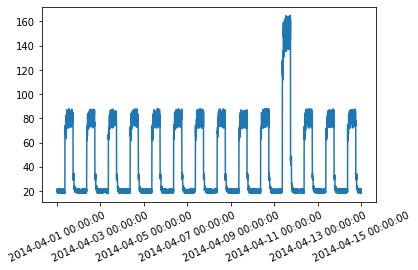

NoisySinusoid completed normally.


In [7]:
#Glitches  -- for  NeuralNetwork__Params_for_PID
#TimeSeriesNN
#Follows closely https://keras.io/examples/timeseries/timeseries_anomaly_detection/
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
import csv
import random
'''Uses the Numenta Anomaly Benchmark(NAB) dataset. 
Provides artifical timeseries data containing labeled anomalous 
periods of behavior. Data are ordered, timestamped, single-valued metrics.
-- Note: We must install NAB with conda env create
We plan to use the art_daily_small_noise.csv file for training and the 
art_daily_jumpsup.csv file for testing. 
The simplicity of the NAB dataset allows us to demonstrate anomaly detection effectively.'''

master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"
#master_url_root = "C:/users/rongrisell/Project/Resusc/NAB-master/NAB-master/data/""

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(df_daily_jumpsup_url)

print(df_daily_jumpsup.head())
def plot_dates_values(data):
    dates = data["timestamp"].to_list()
    values = data["value"].to_list()
    dates = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in dates]
    plt.subplots_adjust(bottom=0.2)
    plt.xticks(rotation=25)
    ax = plt.gca()
    xfmt = md.DateFormatter("%Y-%m-%d %H:%M:%S")
    ax.xaxis.set_major_formatter(xfmt)
    plt.plot(dates, values)
    plt.show()
    
plot_dates_values(df_daily_jumpsup)

class glitches:
    def __init__(self, M, out_f = "NN_3parms_sinusoids.csv"):
        self.out_f = out_f
        self.M = M

    def create_bleeding(self):
        scale = 1 / 80
        MAP_target = 65
        values = df_daily_jumpsup["value"].to_list()
        try:
            outp = open(self.out_f,"w+",encoding="utf8",newline='')
            csv_out = csv.writer(outp, delimiter=',')
            i = 0
            for i in range(0, self.M):
                meas = []
                # twelve measurments at preceeding time steps
                for j in range(0,8):
                    val = MAP_target + values[i+j] * scale - 20 * scale
                    meas.append(val)
                Kp = 1 * random.uniform(0, 1)
                meas.append(Kp)
                Ki = 2.1 * random.uniform(0, 1)
                meas.append(Ki)
                Kd = 0.5 * random.uniform(0, 1)
                meas.append(Kd)
                map = MAP_target
                meas.append(map)
                csv_out.writerow(meas)
                i += 1           
            
            outp.close()
            print("Glitches completed normally.")
        except:
            raise("***output simulation data file couldn't not be openned.")
        finally:
            outp.close()

# Check it -----------------------        
sim = glitches(100,"NN_3parms_glitches.csv")
sim.create_bleeding()